In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from ast import literal_eval
from collections import defaultdict
%matplotlib inline
import random
from sklearn.preprocessing import MinMaxScaler

In [4]:
a1 = pd.read_csv('D:/amazon2.csv')

In [8]:
a1 = PreProcess(a1)

KeyError: "['Product_Rating'] not in index"

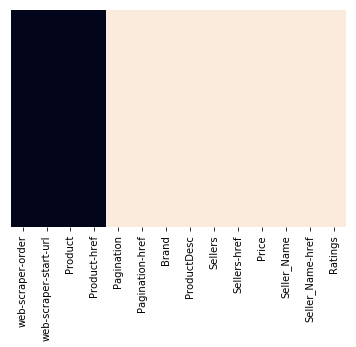

In [6]:
sns.heatmap(a1.isnull(),yticklabels=False,cbar=False)

In [7]:
def PreProcess(dataSet):
    dataSet = dataSet[['Product', 'Product_Rating','Price', 'Seller_Name','Ratings']]
    dataSet['Price'] = dataSet.groupby(['Product'], sort=False)['Price'].apply(lambda x: x.ffill().bfill())
    
    dataSet = dataSet[pd.notnull(dataSet['Seller_Name'])]
   
    dataSet = dataSet.rename(columns={'Seller_Name': 'Seller','Ratings':'Buyer_Feedback'})
    
    rate = dataSet['Buyer_Feedback']
    price = dataSet['Price']
    
    x = rate.values
    y = price.values
    
    pr = pd.Series(x).str.replace(' out of 5 stars', '', regex=True)
    dataSet['Ratings'] = pr
    
    pr2 = pd.Series(y).str.replace('Rs. ', '', regex=True)
    pr3 = pd.Series(pr2).str.replace(',', '', regex=True)
    dataSet['Price'] = pr3
    
    dataSet['Price'] = dataSet.groupby(['Product','Seller'], sort=False)['Price'].apply(lambda x: x.ffill().bfill())
    dataSet['Buyer_Feedback'] = dataSet['Buyer_Feedback'].astype(float)
    dataSet['Buyer_Feedback'] = dataSet.groupby(['Product','Seller'])['Buyer_Feedback'].transform(lambda x: x.fillna(x.mean()))
    return dataSet